# Spam Classification using Naive bayes Algorithm

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [4]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])

In [5]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messages.shape

(5572, 2)

In [7]:
messages.isnull().sum()
# there is no missing values in the dataset

label      0
message    0
dtype: int64

In [8]:
# lets make a new column to detect how long the text messages are:
messages['len'] = messages['message'].apply(len)
messages.head()

,label,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Data Visulization

<AxesSubplot:ylabel='Frequency'>

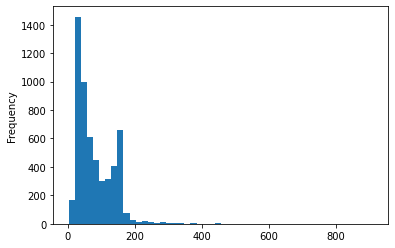

In [10]:
messages['len'].plot(bins=50, kind='hist')

# Text Preprocessing

As we all know classsifier algorithms always  take integer values but we have string in the data set. So first we have to change the string into vectors

 For intial text preprocessig we ill use Tokenization,stopwords,stemming,Bag of words,Unigrams,TF_IDF
 
 
     · Ignoring case

    · Ignoring punctuation

    · Ignoring frequent words that don’t contain much information, called stop words, like “a,” “of,” etc.

    · Fixing misspelled words.

    · Reducing words to their stem (e.g. “play” from “playing”) using stemming algorithms.

In [9]:
import string

df = "My name is pratibha kohli. I am a developer !!!. I am going school "
# Check characters to see if they are in punctuation
nopunc = [char for char in df if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)
nopunc = nopunc.lower()
nopunc = nopunc.split()
print(nopunc)

['my', 'name', 'is', 'pratibha', 'kohli', 'i', 'am', 'a', 'developer', 'i', 'am', 'going', 'school']


In [11]:
# remove the stopwords ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
ps = PorterStemmer()
clean_mess = [ps.stem(word) for word in nopunc if word not in stopwords.words('english')]
print(clean_mess)

['name', 'pratibha', 'kohli', 'develop', 'go', 'school']


In [20]:
ps = PorterStemmer()

In [25]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [ps.stem(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [26]:
messages['message'].head(5).apply(text_process)

0    [go, jurong, point, crazi, avail, bugi, n, gre...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entri, 2, wkli, comp, win, fa, cup, fin...
3        [u, dun, say, earli, hor, u, c, alreadi, say]
4    [nah, dont, think, goe, usf, live, around, tho...
Name: message, dtype: object

In [27]:
messages.head()

,label,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61



## Vectorization

Vectorization means convert string into vectors.We have three ways todo that 


    - Bag of words
    - TF-IDF
    - N-Grams

In [29]:
#Bag of words
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

8195


In [43]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [33]:
X = bow_transformer.transform(messages['message'])

In [44]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 1094)	1
  (0, 1762)	1
  (0, 2652)	1
  (0, 2669)	1
  (0, 3690)	1
  (0, 6202)	2
  (0, 7381)	2
(1, 8195)


In [31]:

y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [34]:


# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [35]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [36]:


#prediction
y_pred=spam_detect_model.predict(X_test)



In [37]:
from sklearn.metrics import accuracy_score,classification_report

In [38]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9829596412556054


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       946
           1       0.97      0.92      0.94       169

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



# TFIDF


This concept includes:

    · Counts. Count the number of times each word appears in a document.

    · Frequencies. Calculate the frequency that each word appears in a document out of all the words in the document.
    
    
    Higher the TFIDF score, the rarer the term is and vice-versa.

In [48]:
# creating TFIDF model
tfidf_transformer = TfidfTransformer().fit(X)
tfidf4 = tfidf_transformer.transform(X)
print(tfidf4.shape)

(5572, 8195)


In [49]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [50]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [51]:
#prediction
y_pred=spam_detect_model.predict(X_test)

In [55]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: 0
expected: ham


In [52]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9829596412556054


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       946
           1       0.97      0.92      0.94       169

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115

